# Linear Regression

This notebook re-creates the figures and tables presented in Chapter 3 of the ISLR.

In [1]:
# import modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# Import data
df_adv = pd.read_csv('./datasets/Advertising.csv')
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## 3.1 Simple Linear Regression

### Figure 3.1

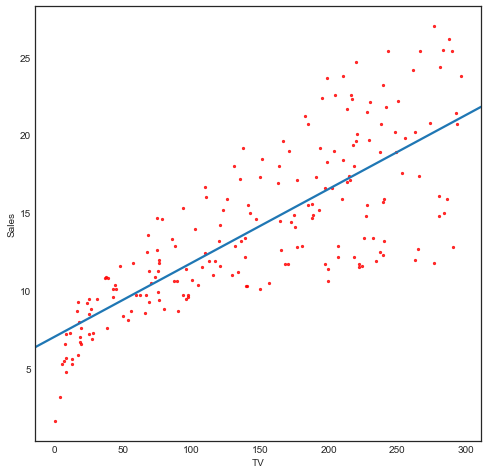

In [3]:
fig = plt.figure(figsize=(8,8))
sns.regplot(x='TV',y='Sales',data=df_adv,ci=None,order=1,scatter_kws={'color':'r','s':5})

In [4]:
# scale data and perform linear regression
reg = skl_lm.LinearRegression()

X_scale = scale(df_adv.TV,with_mean=True, with_std=False).reshape(-1,1)
y = df_adv.Sales

# fit model
reg.fit(X_scale,y)

# print model result
print('Coefficient: \n', reg.coef_[0])
print('Intercept: \n', reg.intercept_)

Coefficient: 
 0.04753664043301976
Intercept: 
 14.0225


In [5]:
# Create beta values
beta_0 = np.linspace(reg.intercept_-2,reg.intercept_+2,50)
beta_1 = np.linspace(reg.coef_[0]-0.02,reg.coef_[0]+0.02,50)

# Create grid
b0, b1 = np.meshgrid(beta_0,beta_1)
RSS = np.zeros((beta_0.size,beta_1.size))

# Compute RSS
for (i,j),val in np.ndenumerate(RSS):
    RSS[i,j] = ((y - b0[i,j] - b1[i,j]*X_scale[:,0])**2).sum()/1000
    
# compute minimum RSS
rss_min = r'$\beta_0$, $\beta_1$ for minimized RSS'
RSS_min = (((y - reg.intercept_ - reg.coef_[0]*X_scale[:,0])**2).sum()/1000)

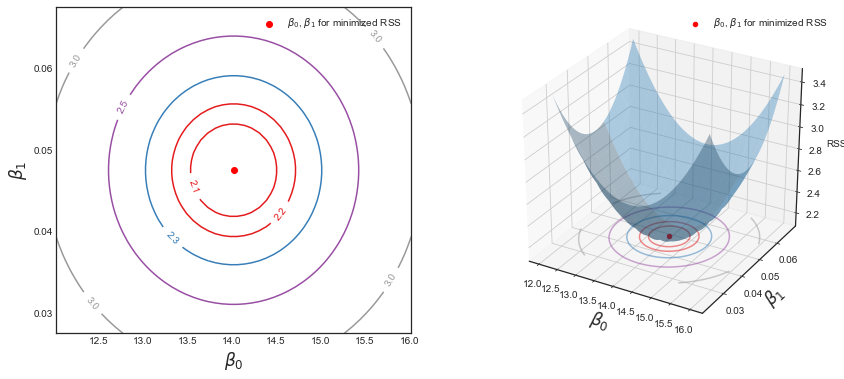

In [6]:
# plot
fig = plt.figure(figsize=(14,6))

# subplots
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

# contour plot
CS=ax1.contour(b0, b1, RSS, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(reg.intercept_, reg.coef_[0], c='r', label=rss_min)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# 3d plot
ax2.plot_surface(b0,b1,RSS,alpha=0.35,cstride=3)
ax2.contour(b0, b1, RSS, zdir='z', offset=RSS.min(), cmap=plt.cm.Set1,
            alpha=0.5, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(reg.intercept_, reg.coef_[0], RSS_min, c='r', label=rss_min)
ax2.set_zlabel('RSS')
ax2.set_zlim(RSS.min(),RSS.max())
ax2.set_ylim(0.02,0.07)

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()